In [49]:
import pandas as pd
import numpy as np
import plotly.express as px
import vnstock
from vnstock import Vnstock
import vnstock3
import datetime as dt
import time 
import matplotlib.pyplot as plt

In [50]:
ticker_fin = ['ACB','BID','CTG','EIB','HCM','HDB','LPB','MBB','MSB','NAB','OCB','SHB','SSB','SSI','STB','TCB','TPB','VCB','VCI','VIB','VIX','VND','VPB']
ticker_VN100 = ['ACB','BID','BVH','CII','CTG','DBC','DGC','DGW','DIG','DPM','DXG','EIB','EVF','FPT','FRT','FTS','GAS','GEE','GEX','GMD','HAG','HCM','HDB','HDG','HPG','HSG','KBC','KDC','KDH','LPB','MBB','MSB','MSN','MWG','NAB','NKG','NLG','OCB','PC1','PDR','PNJ','POW','PVD','REE','SAB','SBT','SHB','SIP','SSB','VHC','VHM','VIB','VIC','VIX','VJC','VND','VNM','VPB','VPI','VRE','VSC','VTP','VCB','VCG','VCI',]

#Big folder to put all the CSV in. Then at the end, pd.concat to stack them together in 1 DataFrame
all_quotes = []

#Divide each in separate. If want to call separately, use code: per_ticker['FPT'].head() or per_ticker['HDB'].tail()
per_ticker = {}

s = Vnstock().stock (symbol = 'ACB', source = 'VCI')
df = s.quote.history (start = str(dt.date.today() - dt.timedelta(365*6) ), end = str(dt.date.today()), interval = '1W')
df['time'] = pd.to_datetime(df['time'])
df.dropna(inplace=True)
Time = df.time.to_list()
DF_Summary = pd.DataFrame(data=Time,columns=['time'])
DF_Fin = DF_Summary

In [51]:
# windows week
for t in ticker_VN100: 
    print(t)
    df = s.quote.history (symbol = t,start = str(dt.date.today() - dt.timedelta(365*6) ), end = str(dt.date.today()), interval = '1W')
    df['time'] = pd.to_datetime(df['time'])
    df = df.drop(columns = ['open', 'high', 'low', 'volume'])
    df.sort_values(by ='time',ascending=False,inplace=True)
    df['log_return'] = np.log(df['close'] / df['close'].shift(-1))*100
    df[f'{t}'] = df['log_return'].apply(lambda x: +1 if x > 0 else -1)
    time.sleep(1.5)
    if t in ticker_fin: 
        DF_Fin = DF_Fin.merge(df[[f'{t}','time']],on = 'time',how='left')
    DF_Summary = DF_Summary.merge(df[[f'{t}','time']],on = 'time',how='left')
DF_Summary

ACB
BID
BVH
CII
CTG
DBC
DGC
DGW
DIG
DPM
DXG
EIB
EVF
FPT
FRT
FTS
GAS
GEE
GEX
GMD
HAG
HCM
HDB
HDG
HPG
HSG
KBC
KDC
KDH
LPB
MBB
MSB
MSN
MWG
NAB
NKG
NLG
OCB
PC1
PDR
PNJ
POW
PVD
REE
SAB
SBT
SHB
SIP
SSB
VHC
VHM
VIB
VIC
VIX
VJC
VND
VNM
VPB
VPI
VRE
VSC
VTP
VCB
VCG
VCI


,time,ACB,BID,BVH,CII,CTG,DBC,DGC,DGW,DIG,...,VND,VNM,VPB,VPI,VRE,VSC,VTP,VCB,VCG,VCI
0,2019-09-08,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2019-09-15,1,1,-1,1,1,1,-1,-1,1,...,1,-1,1,1,-1,-1,1,1,1,1
2,2019-09-22,1,1,-1,-1,1,-1,1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
3,2019-09-29,-1,1,1,1,1,-1,-1,1,1,...,1,1,1,1,-1,-1,-1,1,-1,-1
4,2019-10-06,1,1,-1,1,-1,1,1,1,1,...,-1,-1,1,-1,-1,-1,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2025-08-03,-1,-1,-1,1,-1,-1,-1,-1,-1,...,1,-1,1,1,-1,1,-1,-1,1,1
307,2025-08-10,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,1,1,-1,1
308,2025-08-17,1,1,1,1,1,-1,-1,-1,1,...,1,1,1,1,1,1,-1,1,1,-1
309,2025-08-24,1,1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,1,-1,-1


In [52]:
DF_Summary.set_index('time',inplace=True)
DF_Summary.fillna(0,inplace=True)
DF_Fin.set_index('time',inplace=True)
DF_Fin.fillna(0,inplace=True)


In [53]:
DF_INDEX = s.quote.history (symbol = 'VNINDEX',start = str(dt.date.today() - dt.timedelta(365*6) ), end = str(dt.date.today()), interval = '1D')
DF_INDEX.drop(columns=['open','high','low','volume'], inplace = True)
DF_INDEX

,time,close
0,2019-09-03,979.36
1,2019-09-04,977.63
2,2019-09-05,976.79
3,2019-09-06,974.08
4,2019-09-09,974.12
...,...,...
1494,2025-08-25,1614.03
1495,2025-08-26,1667.63
1496,2025-08-27,1672.78
1497,2025-08-28,1680.86


In [55]:
DF_working = DF_work_Fin = pd.DataFrame()
DF_working = DF_Summary
DF_work_Fin = DF_Fin

In [ ]:
DF_working['A_D'] = DF_working.sum(axis=1) 
DF_working['Progress_A_D'] = DF_working['A_D'].cumsum()

DF_work_Fin['A_D'] = DF_work_Fin.sum(axis=1) 
DF_work_Fin['Progress_A_D'] = DF_work_Fin['A_D'].cumsum()


In [59]:
DF_working

,ACB,BID,BVH,CII,CTG,DBC,DGC,DGW,DIG,DPM,...,VPB,VPI,VRE,VSC,VTP,VCB,VCG,VCI,A_D,Progress_A_D
time,,,,,,,,,,,,,,,,,,,,,
2019-09-08,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-60.0,-60.0
2019-09-15,1,1,-1,1,1,1,-1,-1,1,-1,...,1,1,-1,-1,1,1,1,1,12.0,-48.0
2019-09-22,1,1,-1,-1,1,-1,1,1,-1,1,...,1,-1,-1,-1,-1,-1,-1,1,6.0,-42.0
2019-09-29,-1,1,1,1,1,-1,-1,1,1,1,...,1,1,-1,-1,-1,1,-1,-1,6.0,-36.0
2019-10-06,1,1,-1,1,-1,1,1,1,1,1,...,1,-1,-1,-1,-1,1,1,-1,-10.0,-46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-03,-1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,1,1,-27.0,438.0
2025-08-10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,-1,1,1,-1,1,49.0,487.0
2025-08-17,1,1,1,1,1,-1,-1,-1,1,-1,...,1,1,1,1,-1,1,1,-1,15.0,502.0


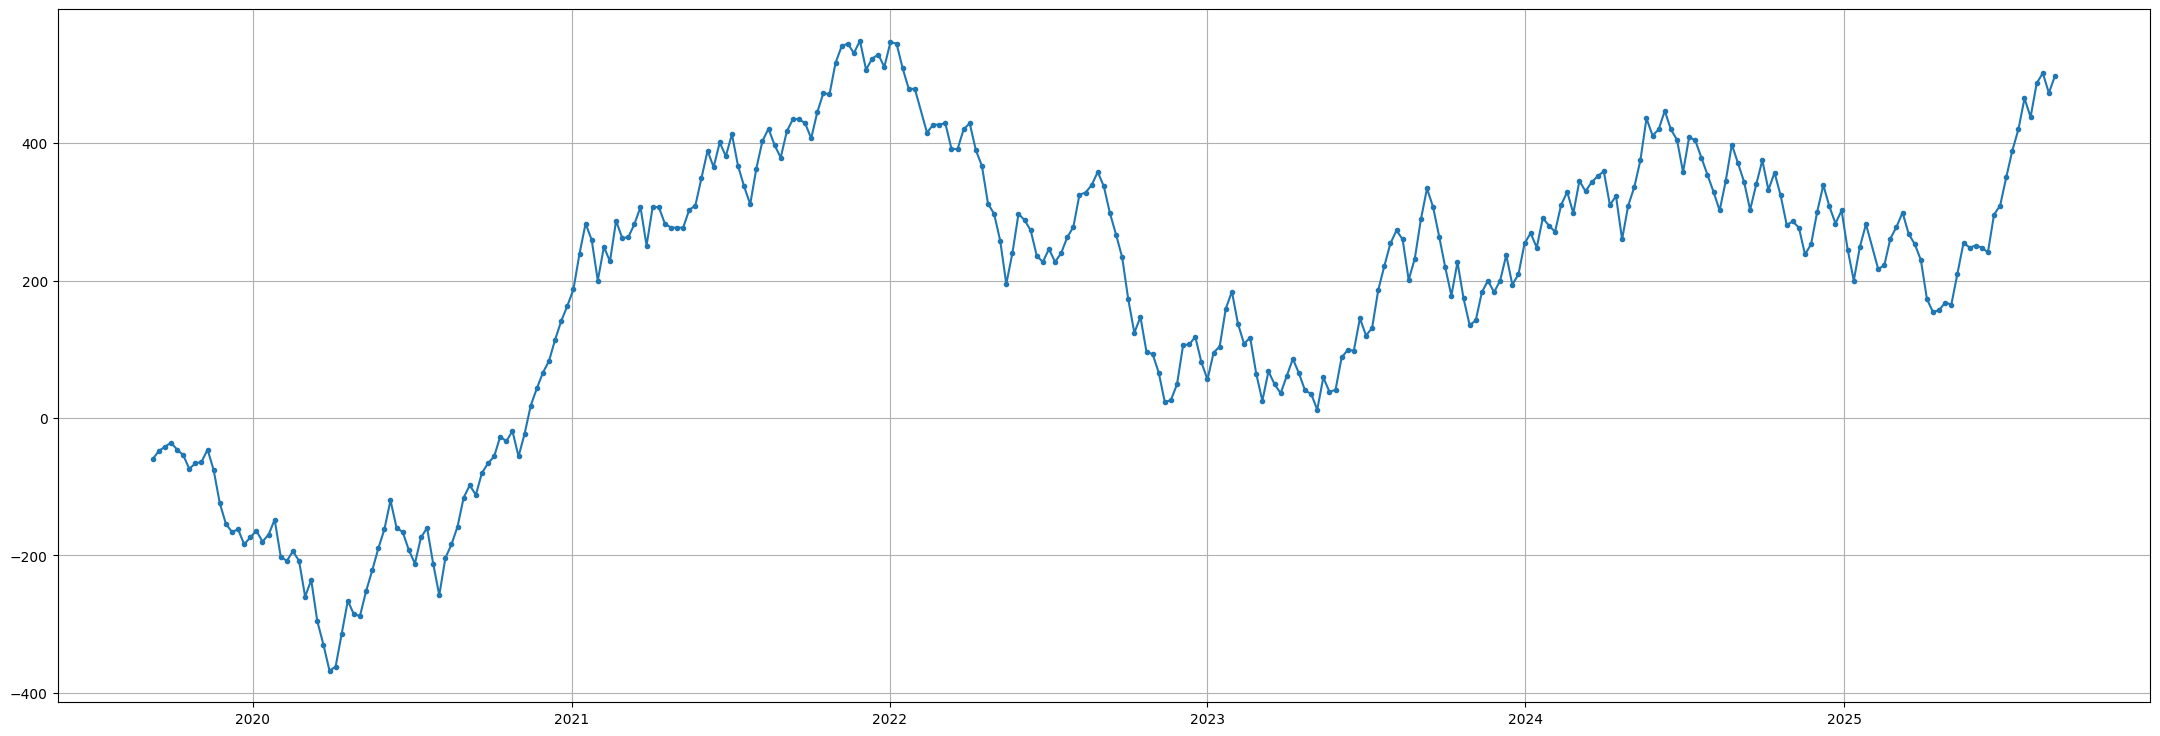

In [60]:
plt.figure(figsize=(27,9))
plt.plot(DF_working['Progress_A_D'],marker = '.')
plt.grid()
plt.show()

In [61]:
DF__ = pd.DataFrame(data = Time,columns=['Time'])
DF__

,Time
0,2019-09-08
1,2019-09-15
2,2019-09-22
3,2019-09-29
4,2019-10-06
...,...
306,2025-08-03
307,2025-08-10
308,2025-08-17
309,2025-08-24


In [ ]:
# DF_merge = pd.merge(df, DF_working['Progress_A_D'], on = 'time')
# # DF_merge['VNINDEX_z'] = (DF_merge['close'] - DF_merge['close'].mean()) / DF_merge['close'].std()
# # DF_merge['AD_z'] = (DF_merge['Progress_A_D'] - DF_merge['Progress_A_D'].mean()) / DF_merge['Progress_A_D'].std()
# # DF_merge
# DF_merge

In [ ]:
# plt.figure(figsize=(40,9))
# # plt.plot(DF_merge['VNINDEX_z'], DF_merge['AD_z'],marker = '.')
# DF_merge.plot(x = 'time', y = ['VNINDEX_z', 'AD_z'])
# plt.grid()
# plt.show()

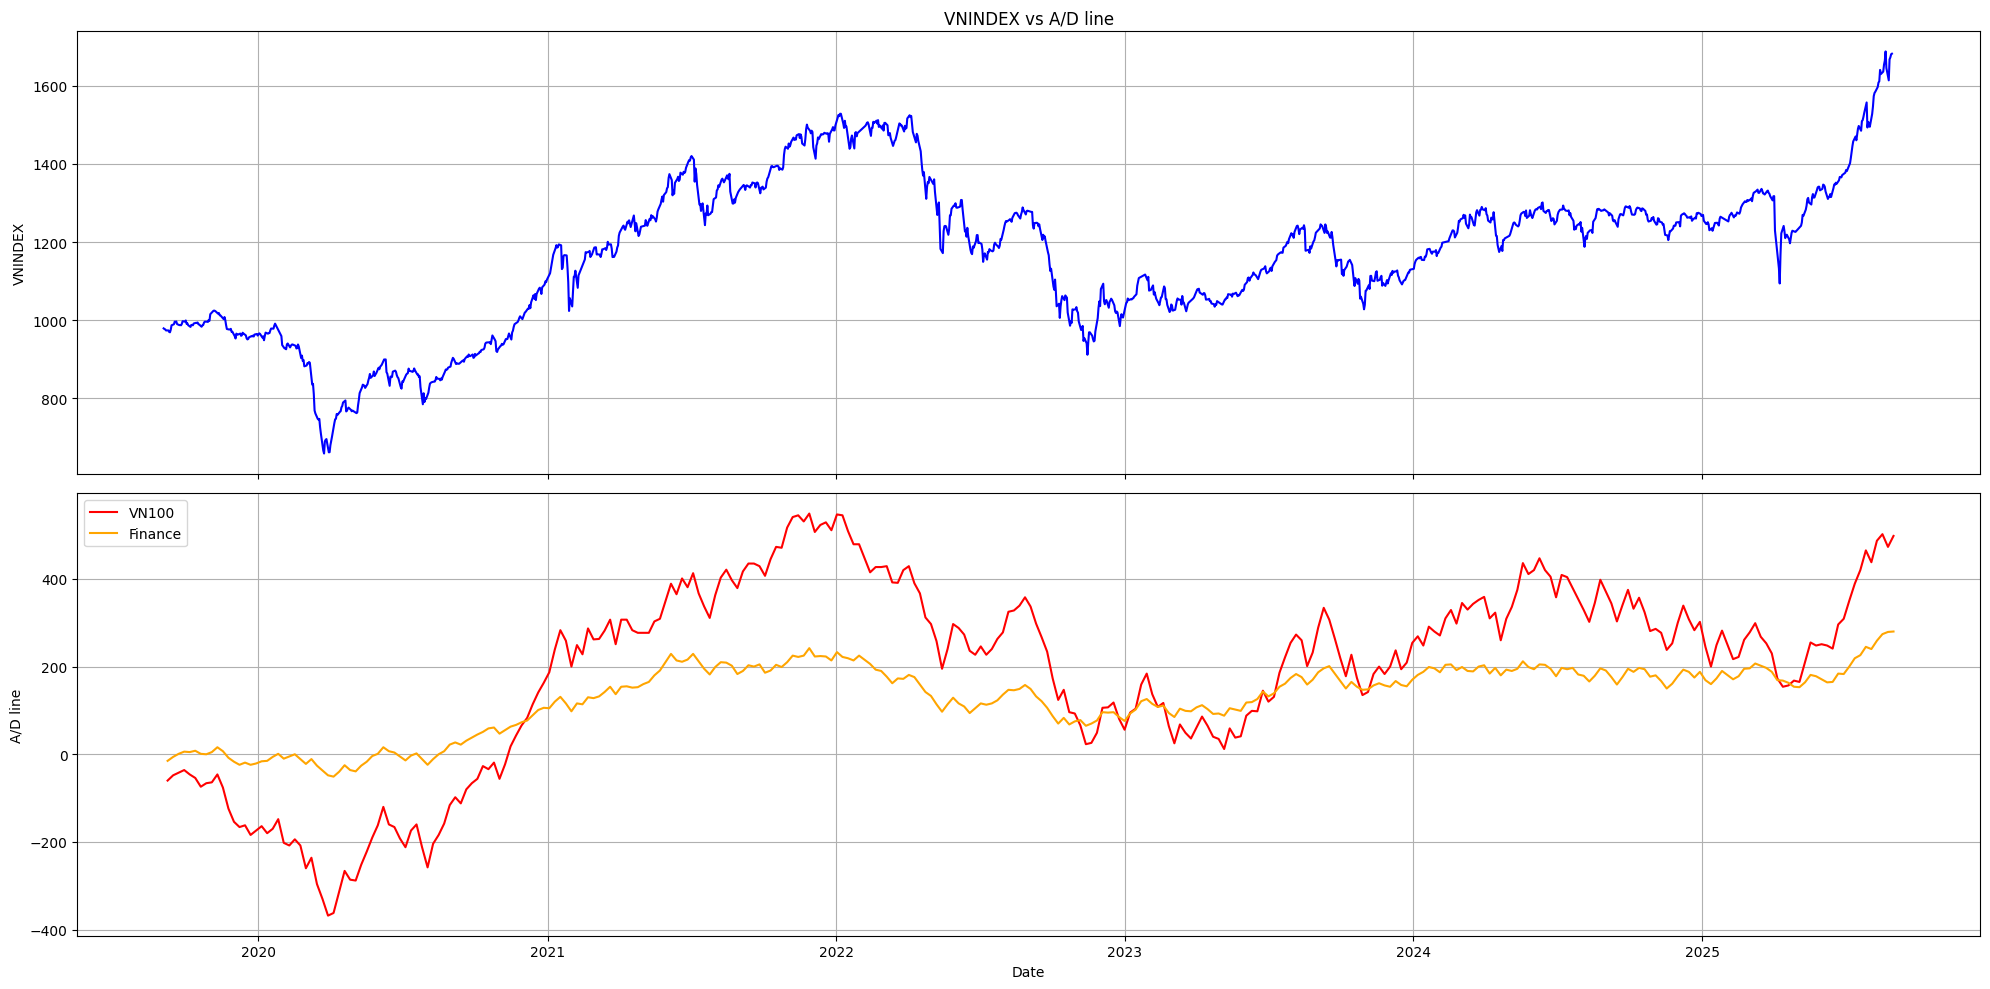

In [68]:
# AD line 
fig, axes = plt.subplots(2, 1, figsize=(20,10), sharex=True)

# First subplot (VNINDEX)
axes[0].plot(DF_INDEX['time'], DF_INDEX['close'], color='blue')
axes[0].set_ylabel("VNINDEX")
axes[0].grid()
axes[0].set_title("VNINDEX vs A/D line")

# Second subplot (Other Index)
axes[1].plot(DF_working.index, DF_working['Progress_A_D'], color='red',label = 'VN100')
axes[1].plot(DF_work_Fin.index, DF_work_Fin['Progress_A_D'], color='orange',label = 'Finance')
axes[1].set_ylabel("A/D line")
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel("Date")

plt.tight_layout()
plt.show()
        
        
        
    

In [ ]:
!git add .
!git commit -m "New one"
!git push origin main

# !git pull origin main